OBJECTIVE



IMPORTING LIBRARIES


In [173]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DATABASE CONNECTION

In [174]:
path="/Users/shrashtipatidar/Downloads/"
database = path +'travel.sqlite'


In [175]:
connection=sqlite3.connect(database)#database load and connection created

cursor=connection.cursor()# Create a cursor object to execute SQL queries
print("success")

success


In [176]:
#In this case, it selects only one column (name), so each tuple will have only one element:
cursor.execute("""select name from sqlite_master where type ='table'; """)

# performing list comprehension and extarcting the table names and further storing the tables into a var 
#For each tuple (table), it extracts the first element (table[0]), which is the table name.
#now cursor provides data in form of a list and then we need to extract in variable therfore we use pandas to make it easy.

table_list = [table[0] for table in cursor.fetchall()]
print(f'The list of tables available are : \n{table_list}')

The list of tables available are : 
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


DATA  EXPLORATION

In [177]:
#pandas provide data frames directly
aircrafts_data=pd.read_sql_query("select * from aircrafts_data",connection)
aircrafts_data


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [178]:
aircrafts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


In [179]:
aircrafts_data.shape

(9, 3)

In [180]:
airports_data=pd.read_sql_query("select * from airports_data",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [181]:
boarding_passes=pd.read_sql_query("select * from boarding_passes ",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [182]:
bookings=pd.read_sql_query("select * from bookings ",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [183]:
flights=pd.read_sql_query("select * from flights ",connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [184]:
seats=pd.read_sql_query("select * from seats ",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [185]:
ticket_flights=pd.read_sql_query("select * from ticket_flights  ",connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [186]:
tickets=pd.read_sql_query("select * from tickets  ",connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [187]:
for table in table_list:
    print('\ntable',table)
    column_info=cursor.execute("PRAGMA table_info({})".format(table)) # to retrieve column details for each table.
    for column in column_info.fetchall():
        print(column[1:3])


table aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('

In [188]:
# to check missing values

for table in table_list:
    print('\ntable',table)
    df_table=pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())
#df_table ==>> only prints the last table bcoz outside the loop


table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


BASIC ANALYSIS

In [189]:
seats=pd.read_sql_query("select * from seats",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [190]:
pd.read_sql_query(""" select aircraft_code,count(*) as num_seats from seats
                   group by aircraft_code having num_seats>100""" , connection)
                  

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


how the number of tickets booked and total amount earned changed with time?


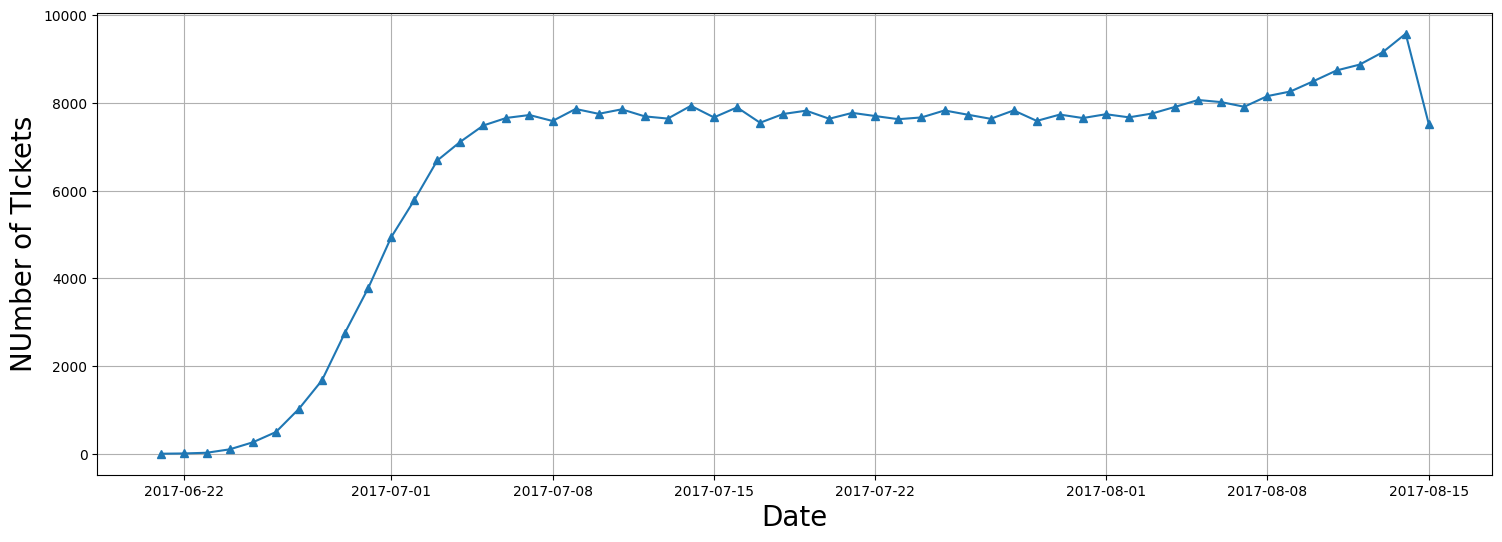

In [191]:
#we are joining booking tables also  bcoz we not only want tickets but also how many of them are booked
tickets=pd.read_sql_query("""select * from tickets inner join bookings 
                              on tickets.book_ref=bookings.book_ref""",connection)
tickets['book_date']=pd.to_datetime(tickets['book_date']) 
tickets['date']=tickets['book_date'].dt.date # to add new column of date in dataframe 
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('NUmber of TIckets',fontsize=20)
plt.grid('b')
plt.show()



In [192]:
x=tickets.groupby('date')[['date']].count()
x

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


In [193]:
#Changes made to a pandas DataFrame (like conversions, calculations, grouping) are local to Python and do not automatically affect 
#the underlying SQL database.In above  ccell bookings is sql tbl
'''This fetches the entire bookings table from your database and stores it in a pandas DataFrame named bookings.'''

'This fetches the entire bookings table from your database and stores it in a pandas DataFrame named bookings.'

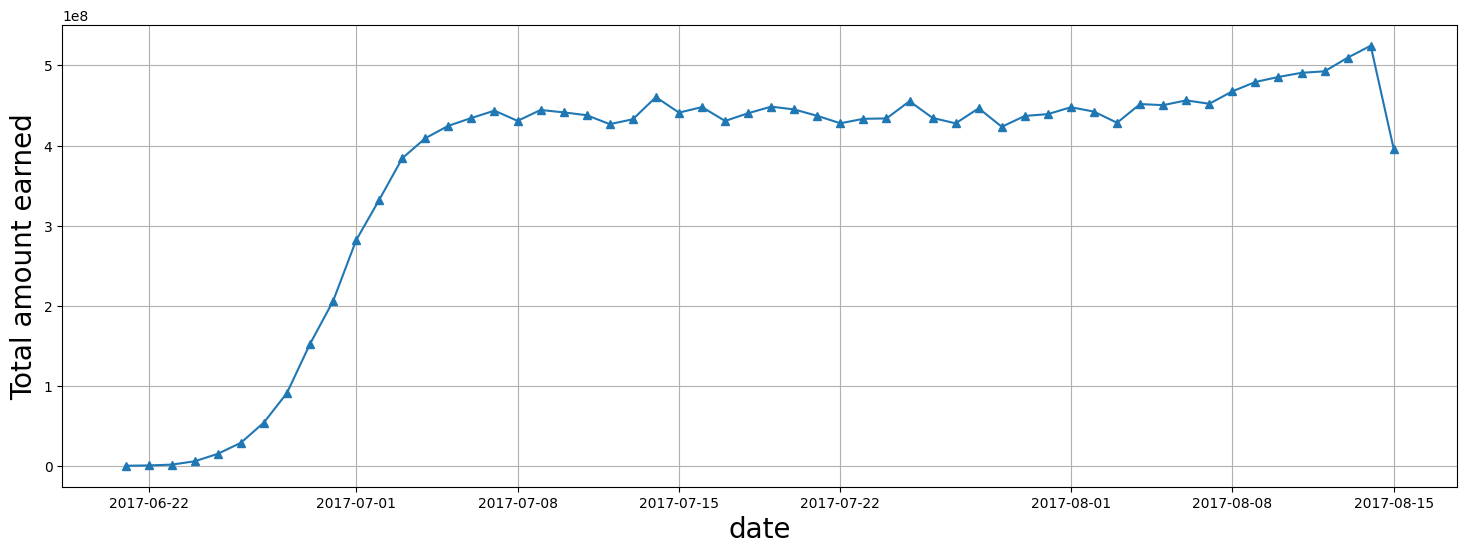

In [194]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings['book_date']=pd.to_datetime(bookings['book_date']) #book_date column in the bookings DataFrame to datetime format using pandas.
bookings['date']=bookings["book_date"].dt.date   #Use the .dt.date accessor to extract the date part from the book_date column and assign it to a new column date.
x=bookings.groupby('date')[['total_amount']].sum() #Single brackets return a Series, whereas double brackets return a DataFrame.
plt.figure(figsize=(18,6))
plt.plot(x.index, x['total_amount'],marker='^') #x['total_amount'] contains the total amount for each corresponding date.
plt.xlabel('date',fontsize=20)
plt.ylabel('Total amount earned',fontsize=20)
plt.grid('b')
plt.show()

Calculate the average charges for each aircraft with different fare conditions


In [195]:
#now charges means we need amount . Therefore we need a table with amount,fare conditions and a table which we can join and get aircraft code.

#The aircraft code is a unique identifier for a specific aircraft type or model, example Boeing7377
#FLight id is specific flights for a particular day whick keeps changing based in routes passengers,etc

df=pd.read_sql_query('''select aircraft_code,fare_conditions,avg(amount) from ticket_flights join flights on ticket_flights.flight_id=flights.flight_id
                         group by aircraft_code, fare_conditions''',connection)
df

,aircraft_code,fare_conditions,avg(amount)
0,319,Business,113550.55770292656
1,319,Economy,38311.40234713914
2,321,Business,34435.66266431457
3,321,Economy,11534.97476439323
4,733,Business,41865.626175253856
5,733,Economy,13985.152
6,763,Business,82839.84286649604
7,763,Economy,27594.7218286053
8,773,Business,57779.90943535718
9,773,Comfort,32740.552888786075


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

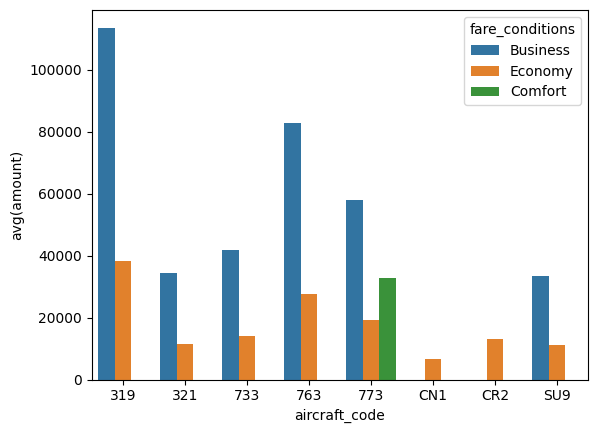

In [196]:
sns.barplot(data=df,x='aircraft_code',y='avg(amount)',hue='fare_conditions')

ANALYZING OCCUPANCY RATE

For each aircraft calculate the total revenue per year and average revenue per ticket.

In [197]:
pd.read_sql_query(""" select aircraft_code , ticket_count, total_revenue ,total_revenue/ticket_count as average_revenue_per_ticket from 
                    (select aircraft_code,count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                      join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code )""",connection)
#second and third line are part of subquery which will give data to main query in first line.


,aircraft_code,ticket_count,total_revenue,average_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


Calculate the avearge occupancy per aircraft 

In [198]:
pd.read_sql_query('''select aircraft_code ,flights.flight_id, count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id=flights.flight_id group by aircraft_code''',connection)
# we wrote from boarding_passes inner join flights because it boarding pass table is bigger also it matches each flight id of 
#each passenger from booking table with aircraft table .
#ach row in boarding_passes represents a boarding pass, this essentially counts the number of boarding passes for each aircraft_code.
#no need to group by flightid bcoz we want seats in each aircraft.

,aircraft_code,flight_id,seats_count
0,319,1214,29310
1,321,9307,57726
2,733,6223,47752
3,763,17003,69046
4,773,30625,82127
5,CN1,2575,8130
6,CR2,2055,83912
7,SU9,24836,201683


In [200]:
#check bookings table.
occupancy_rate= pd.read_sql_query(""" select a.aircraft_code ,avg(a.seats_count) as booked_seats , b.num_seats ,avg(a.seats_count)/b.num_seats as occupancy_rate
                    from
                    (
                    select aircraft_code ,flights.flight_id, count(*) as seats_count from boarding_passes 
                    inner join flights
                    on boarding_passes.flight_id=flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join
                    (select aircraft_code, count(*) as num_seats from seats group by aircraft_code)as b
                    on a.aircraft_code=b.aircraft_code group by a.aircraft_code""",connection)
occupancy_rate



,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


Calculate by how much total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [201]:
occupancy_rate['Increased occupancy rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,Increased occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [ ]:
pd.set_option('display.float_format',str)

In [202]:
total_revenue=pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
                join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code""",connection)
total_revenue
occupancy_rate['INC in total annual turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Increased occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Increased occupancy rate,INC in total annual turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [ ]:
REVENUE GENERATED BY EACH AIRPORT

In [205]:
pd.read_sql_query("""select ad.airport_code, ad.airport_name, sum(tf.amount) as cash from airports_data ad
                    inner join flights f on ad.airport_code = f.departure_airport
                    inner join ticket_flights tf on tf.flight_id = f.flight_id
                    group by ad.airport_code
                    order by cash desc
                    limit 10""", connection)


,airport_code,airport_name,cash
0,DME,"{""en"": ""Domodedovo International Airport"", ""ru...",3489450200
1,SVO,"{""en"": ""Sheremetyevo International Airport"", ""...",3005036300
2,LED,"{""en"": ""Pulkovo Airport"", ""ru"": ""Пулково""}",1469442200
3,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...",1309975700
4,OVB,"{""en"": ""Tolmachevo Airport"", ""ru"": ""Толмачёво""}",1274457100
5,VKO,"{""en"": ""Vnukovo International Airport"", ""ru"": ...",968456800
6,IKT,"{""en"": ""Irkutsk Airport"", ""ru"": ""Иркутск""}",663253700
7,AER,"{""en"": ""Sochi International Airport"", ""ru"": ""С...",546738000
8,SVX,"{""en"": ""Koltsovo Airport"", ""ru"": ""Кольцово""}",514530000
9,PEE,"{""en"": ""Bolshoye Savino Airport"", ""ru"": ""Пермь""}",433534400
